In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
from pandas import Series, DataFrame
%matplotlib inline


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler()

In [3]:
def set_font(n):
    font = {'weight' : 'normal',
            'size'   : n}
    plt.rc('font', **font)
set_font(14)

# 1. Smoothing spline
---

### Sample for using univariate spline(python version  smooth.spline but without adjustable lambda)

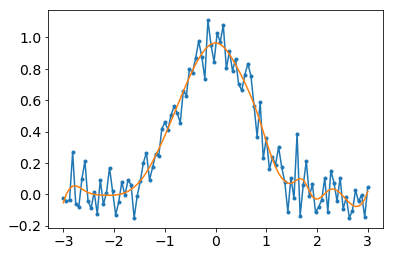

In [4]:
from numpy import linspace,exp
from numpy.random import randn
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = linspace(-3, 3, 100)
y = exp(-x**2) + randn(100)/10
s = UnivariateSpline(x, y, s=1)
xs = linspace(-3, 3, 100)
ys = s(xs)
plt.plot(x, y, '.-')
plt.plot(xs, ys)
plt.show()

In [5]:
ffun = lambda x: np.exp(-(x-3)**2)
x = np.arange(0.1, 4.1 ,0.1)
rnd.seed(2017)
y = ffun(x) + 0.1*rnd.normal(size=len(x))

No overfitting: splines converge

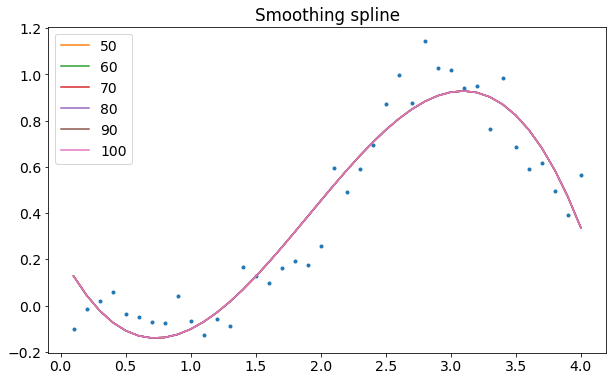

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(x, y, '.')
plt.title('Smoothing spline')

from scipy.interpolate import UnivariateSpline
# for de in np.array([0.0, 0.2, 0.95]):
for de in np.arange(50,110,10):
    s = UnivariateSpline(x, y, s=40)
    ynew = s(x)
    plt.plot(x,ynew, label=de)
plt.legend(loc=2)
plt.show()

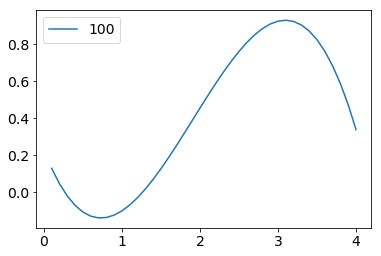

In [7]:
de=100
s = UnivariateSpline(x, y, s=de)
ynew = s(x)
plt.plot(x,ynew, label=de)
plt.legend(loc=2)
plt.show()

## 1.1 Regularization Paths

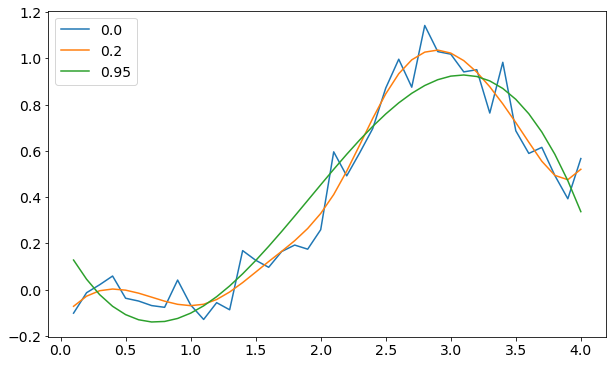

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
for de in np.array([0.0, 0.2, 0.95]):
    s = UnivariateSpline(x, y, s=de)
    ynew = s(x)
    plt.plot(x,ynew, label=de)
plt.legend(loc=2)
plt.show()

In [9]:
x.shape

(40,)

In [10]:
y.shape

(40,)

In [11]:
de = 0.4

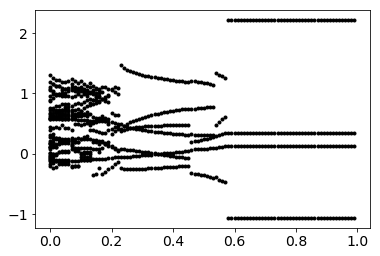

In [12]:
for de in np.arange(0,1,0.01):
    s = UnivariateSpline(x, y, s=de)
#     bb = np.concatenate((bb, s.get_coeffs().reshape(len(s.get_coeffs()),1)), axis=1)
    tmp = s.get_coeffs()
    l = len(tmp)
    plt.plot([de] * l, tmp, 'k.')

# 1.2 Hyperparameter selection

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
#help(Pipeline)

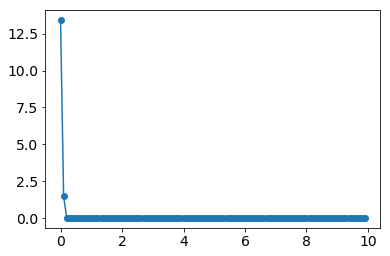

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
x = np.arange(0.1,4.1,0.1)
y = np.exp(-(x-3)**2) + 0.1*rnd.normal(size=len(x))

ss = np.arange(0,10,0.1)
scores = []

#print(ytest)
#print(y)
for s in ss:
    score = 0
    kfold = KFold(n_splits=10).split(x, y)
    for k, (train, test) in enumerate(kfold):
        us = UnivariateSpline(x[train],y[train],s = s)
        xline = x[test]
        ytest = us(xline)
        score = score + 1/len(y) * sum((ytest-y[test])**2)#Use MSE here
        #print(score,"\n")
    scores.append(np.mean(score))


plt.plot(ss,scores,'-o')

plt.show()

# 2. Shrinkage Method
---
## 2.1 Ridge regression

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = DataFrame(iris['data'], columns=iris['feature_names'])

The following modification serves to align with R's Iris data

In [16]:
iris_df.iloc[37] = Series([4.9, 3.6, 1.4, 0.1], index=iris['feature_names'])
iris_df.iloc[34] = Series([4.9, 3.1, 1.5, 0.2], index=iris['feature_names'])

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
new_features = ['SL2', 'SW2', 'PL2', 'PW2']
for i in range(4):
    iris_df[new_features[i]] = np.square(iris_df.iloc[:,i])

In [19]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),SL2,SW2,PL2,PW2
0,5.1,3.5,1.4,0.2,26.01,12.25,1.96,0.04
1,4.9,3.0,1.4,0.2,24.01,9.00,1.96,0.04
2,4.7,3.2,1.3,0.2,22.09,10.24,1.69,0.04
3,4.6,3.1,1.5,0.2,21.16,9.61,2.25,0.04
4,5.0,3.6,1.4,0.2,25.00,12.96,1.96,0.04


In [20]:
from sklearn.linear_model import Ridge

In [21]:
selected = np.array([1,2,3,5,6,7])

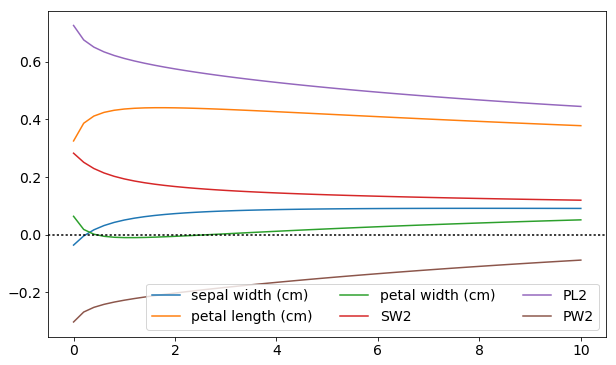

In [22]:
ss = np.arange(0, 10.2, 0.2)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
coef = []

for i in ss:
    clf = Ridge(alpha=i, normalize=False)
    ridge_regression = Pipeline((
            ("std_scaler", std_scaler),
            ("ridge", clf)))
    ridge_regression.fit(iris_df.iloc[:,selected], iris_df.iloc[:,0].values.reshape(150,1))
    coef.append(clf.coef_[0])


coef_df = DataFrame(coef, index=ss, columns=iris_df.columns[selected])

plt.plot(coef_df.index, coef_df)
plt.legend(coef_df.columns, loc=4, ncol=3)

plt.axhline(0, c='k', ls=':')
plt.show()

In [23]:
coef_df['penalty'] = np.square(coef_df.iloc[:,0:6]).sum(axis=1)
coef_df.head()

,sepal width (cm),petal length (cm),petal width (cm),SW2,PL2,PW2,penalty
0.0,-0.036600,0.325384,0.063451,0.282798,0.726725,-0.303822,0.811653
0.2,-0.004823,0.386913,0.017726,0.251191,0.676475,-0.269208,0.743227
0.4,0.016419,0.411786,0.001242,0.229549,0.651465,-0.253006,0.710950
0.6,0.031298,0.424624,-0.006047,0.214066,0.634931,-0.242574,0.689125
0.8,0.042207,0.431967,-0.009341,0.202451,0.622395,-0.234679,0.671900


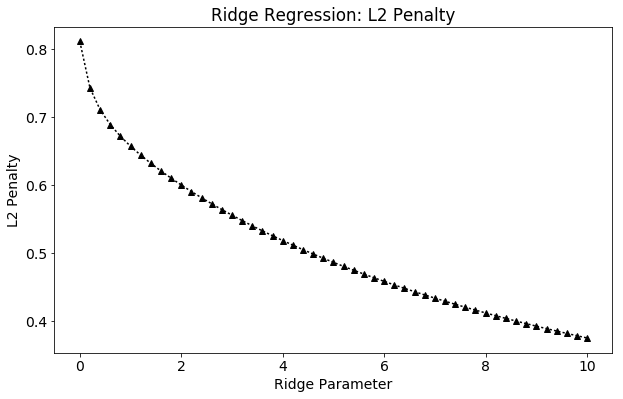

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(coef_df.index, coef_df['penalty'], 'k^:')
plt.title('Ridge Regression: L2 Penalty')
plt.xlabel('Ridge Parameter')
plt.ylabel('L2 Penalty')
set_font(14)
plt.show()

## 2.2. Lasso

In [25]:
from sklearn.linear_model import Lasso

In [26]:
i=0.5

In [27]:
las = Lasso(alpha=i, normalize=False)
ridge_regression = Pipeline((
            ("std_scaler", std_scaler),
            ("lasso", las)))
ridge_regression.fit(iris_df.iloc[:,selected], iris_df.iloc[:,0].values.reshape(150,1))

Pipeline(steps=(('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))))

In [28]:
las.coef_

array([-0.        ,  0.        ,  0.        , -0.        ,  0.24072073,  0.        ])

In [29]:
coef_df.head()

,sepal width (cm),petal length (cm),petal width (cm),SW2,PL2,PW2,penalty
0.0,-0.036600,0.325384,0.063451,0.282798,0.726725,-0.303822,0.811653
0.2,-0.004823,0.386913,0.017726,0.251191,0.676475,-0.269208,0.743227
0.4,0.016419,0.411786,0.001242,0.229549,0.651465,-0.253006,0.710950
0.6,0.031298,0.424624,-0.006047,0.214066,0.634931,-0.242574,0.689125
0.8,0.042207,0.431967,-0.009341,0.202451,0.622395,-0.234679,0.671900


Try glmnet

In [30]:
from sklearn.linear_model import ElasticNet

/Users/lihaoyu/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


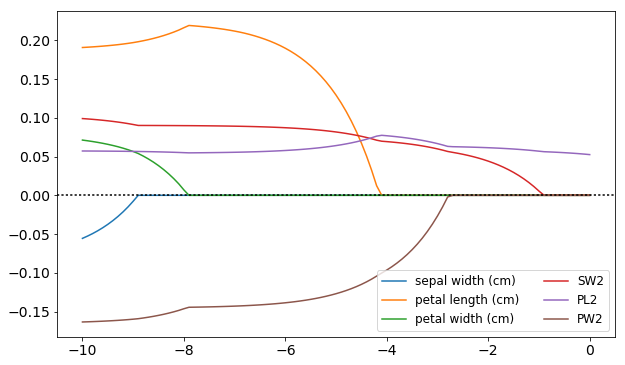

In [31]:
ss = np.exp(np.arange(-10, 0.1, 0.1))

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
coef = []

for i in ss:
    las = ElasticNet(l1_ratio = 1, alpha=i, fit_intercept=True)
#     ridge_regression = Pipeline((
#             ("std_scaler", std_scaler),
#             ("lasso", las)))
#     ridge_regression.fit(iris_df.iloc[:,selected], iris_df.iloc[:,0].values.reshape(150,1))
    las.fit(iris_df.iloc[:,selected], iris_df.iloc[:,0].values.reshape(150,1))
    coef.append(las.coef_)


coef_df = DataFrame(coef, index=ss, columns=iris_df.columns[selected])

plt.plot(np.arange(-10, 0.1, 0.1), coef_df)
plt.legend(coef_df.columns, loc=4, ncol=2, fontsize=12)

plt.axhline(0, c='k', ls=':')
plt.show()

/Users/lihaoyu/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


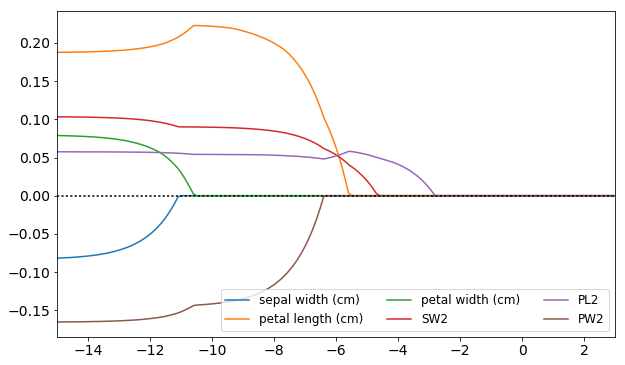

In [32]:
ss = np.exp(np.arange(-15, 3.1, 0.1))

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
coef = []

for i in ss:
    las = Lasso(alpha=i,fit_intercept = True, normalize = True)
#     ridge_regression = Pipeline((
#             ("std_scaler", std_scaler),
#             ("lasso", las)))
#     ridge_regression.fit(iris_df.iloc[:,selected], iris_df.iloc[:,0].values.reshape(150,1))
    las.fit(iris_df.iloc[:,selected], iris_df.iloc[:,0].values.reshape(150,1))
    coef.append(las.coef_)


coef_df = DataFrame(coef, index=ss, columns=iris_df.columns[selected])

plt.plot(np.arange(-15, 3.1, 0.1), coef_df)
plt.xlim([-15,3])
plt.legend(coef_df.columns, loc=4, ncol=3, fontsize=12)

plt.axhline(0, c='k', ls=':')
plt.show()

In [33]:
import pywt
cA, cD = pywt.dwt([1,2,3,4],'db1')
cA

array([ 2.12132034,  4.94974747])

In [55]:
from sklearn.linear_model import LinearRegression
ffun2 = lambda x: 0.5*np.sin(3*x) + 0.25*np.sin(10*x)

np.concatenate(([1],[5,6,7]))
x = linspace(0.1,4,4)
y = ffun2(x) + 0.1*np.random.normal(len(x))
print(x)
print(y)
LRfit = LinearRegression()
LRfit.fit(x.reshape(-1,1), y.reshape(-1,1))
beta = LRfit.coef_
beta[-1]


[ 0.1  1.4  2.7  4. ]
[ 0.91042273  0.36415883  1.27633377  0.47028671]


array([-0.03140255])

In [ ]:
import random
from sklearn.linear_model import LinearRegression
HaarFun = lambda x: 0 if(x<0 or x>=1) else (1 if(x<1/2) else -1)
def BasisHaar(x, nlevel = 3):
    u = (x-min(x))/(np.diff(max(x)-min(x))+1e-10)
    xphi = [HaarFun(u)]
    xname = [0]
    for(j in range(nlevel)):
        for(k in range(2*j-1)):
            xphi = np.concatenate(xphi,2**(j/2)*HaarFun((2**j)*u-k))
        for i in range(2**j):
            xname.append(j)
        return(xphi)
ffun2 = lambda x: 0.5*np.sin(3*x) + 0.25*np.sin(10*x)
x = linspace(0.1,4,256)
random.seed(2017)
y = ffun2(x) + 0.1*np.random.normal(len(x))

nlevel = 5
xphi = BasisHaar(x,nlevel)
LRfit = LinearRegression(fit_intercept = True, copy_X = True)
LRfit.fit(x.reshape(-1,1), y.reshape(-1,1))
beta = LRfit.coef_
plt.subplot(221)
plt.hist(beta[-1], color=2, label="Wavelet Coefficients (nlevel=5)")
plt.subplot(222)
#######stop here ################################################
matplot(x, cbind(y,fit$fit), ylab = "y",
        type="l",  lty=1, col=c(1,4), lwd=c(1,2),
        main="Wavelet Estimate")


In [ ]:
HaarFun = function(x) ifelse(x<0 | x>=1, 0, ifelse(x<1/2, 1, -1))
BasisHaar = function(x, nlevel=3) {
  u = (x-min(x))/(diff(range(x))+1e-10)
  xphi = HaarFun(u)
  xname = 0
  for (j in 1:nlevel) {
    for (k in seq(0,2^j-1)) xphi = cbind(xphi, 2^(j/2)*HaarFun(2^j*u-k))
    xname=c(xname,rep(j, 2^j))
  }
  colnames(xphi) = xname
  return(xphi)
} 

ffun2 = function(x) 0.5*sin(3*x) + 0.25*sin(10*x)
x = seq(0,4,length.out=256)
set.seed(2017)
y = ffun2(x) + 0.1*rnorm(length(x))
 
nlevel = 5
xphi= BasisHaar(x,nlevel)
fit = lm(y ~ xphi)
beta = coef(fit)
par(mfrow=c(2,2))
plot(beta[-1], type="h", col=1+as.numeric(colnames(xphi)),
     main="Wavelet Coefficients (nlevel=5)", ylab="")
abline(h=0, lty=3, col=1)
#######stop here ################################################
matplot(x, cbind(y,fit$fit), ylab = "y",
        type="l",  lty=1, col=c(1,4), lwd=c(1,2),
        main="Wavelet Estimate")
thres = 0.1*sqrt(2*log(length(x))/length(x))
beta = ifelse(abs(beta)>thres, beta, 0)
# sign(beta)*pmax(abs(beta)-thres, 0) # soft 
plot(beta[-1], type="h", col=1+as.numeric(colnames(xphi)),
     main=paste("Wavelet Shrinkage with lambda =", round(thres,3)), ylab="")
abline(h=0, lty=3, col=1)
abline(h=c(-thres, thres), lty=2, col=1)
yhat = cbind(rep(1,dim(xphi)[1]), xphi)%*% beta 
matplot(x, cbind(y,yhat), ylab = "y",
        type="l",  lty=1, col=c(1,4), lwd=c(1,2),
        main="Wavelet Shrinkage Smoothing")